In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
images = []
labels = []
train_data = '/content/drive/MyDrive/dogcat/train'

count = 0
for i in os.listdir(train_data):
  category_path = os.path.join(train_data,i)

  for j in os.listdir(category_path):
    count+=1
    if (count == 1000):
      break
    image_path = os.path.join(category_path,j)
    image = cv2.imread(image_path,0)
    image = cv2.resize(image,(64,64))
    images.append(image)

    labels.append(i)

  count = 0

In [10]:
X = np.array(images)
y = np.array(labels)
X = X/255
X_flatten = X.reshape(1695,-1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2)

In [12]:
para_grid = {
    'C':[1,5,10],
    'kernel': ['linear', 'rbf', 'poly']
}

In [13]:
svm = SVC()

grid_search = GridSearchCV(svm, para_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [14]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 0.6430678466076696
              precision    recall  f1-score   support

         cat       0.62      0.32      0.43       139
         dog       0.65      0.86      0.74       200

    accuracy                           0.64       339
   macro avg       0.64      0.59      0.58       339
weighted avg       0.64      0.64      0.61       339



In [31]:
test_image_path = '/content/drive/MyDrive/dogcat/test/113.jpg'

test_image = cv2.imread(test_image_path,0)
test_image = cv2.resize(test_image,(64,64))

test_image_flatten = test_image.reshape(-1,64*64)

In [32]:
pred = grid_search.predict(test_image_flatten)

The predicition is:  ['dog']


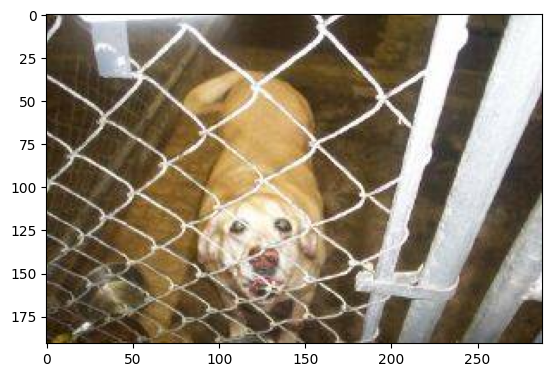

In [33]:
print("The predicition is: ",pred)
plt.imshow(plt.imread(test_image_path))